# Ejercicio Módulo 5 (Machine Learning y Deap Learning)

## 1. AirBnB NYC.

In [1]:
import pandas as pd  
df = pd.read_csv("AB_NYC_2019.csv")  
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### 1.1. Quitar columnas (id, host_id, host_name).

In [2]:
df = df.drop(columns=["id", "host_id", "host_name"])  
df.head(5)

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### 1.2. Descomponer la fecha (año/mes/día).

In [3]:
df["last_review"] = pd.to_datetime(df["last_review"], errors="coerce")  

df["year"] = df["last_review"].dt.year  
df["month"] = df["last_review"].dt.month  
df["day"] = df["last_review"].dt.day  

df.head(5)

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,year,month,day
0,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,2018.0,10.0,19.0
1,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,2019.0,5.0,21.0
2,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365,NaN,NaN,NaN
3,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,2019.0,7.0,5.0
4,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,2018.0,11.0,19.0


In [4]:
df["year"] = df["year"].astype("Int64")
df["month"] = df["month"].astype("Int64")
df["day"] = df["day"].astype("Int64")

df.head(5)

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,year,month,day
0,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,2018,10,19
1,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,2019,5,21
2,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365,<NA>,<NA>,<NA>
3,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,2019,7,5
4,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,2018,11,19


In [5]:
df["year"] = df["year"].fillna(0).astype(int)
df["month"] = df["month"].fillna(0).astype(int)
df["day"] = df["day"].fillna(0).astype(int)

df.head(5)

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,year,month,day
0,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,2018,10,19
1,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,2019,5,21
2,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365,0,0,0
3,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,2019,7,5
4,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,2018,11,19


## 1.2. EDAs.

### 2.1. Análisis Univariante

### 2.1.1. Histograms

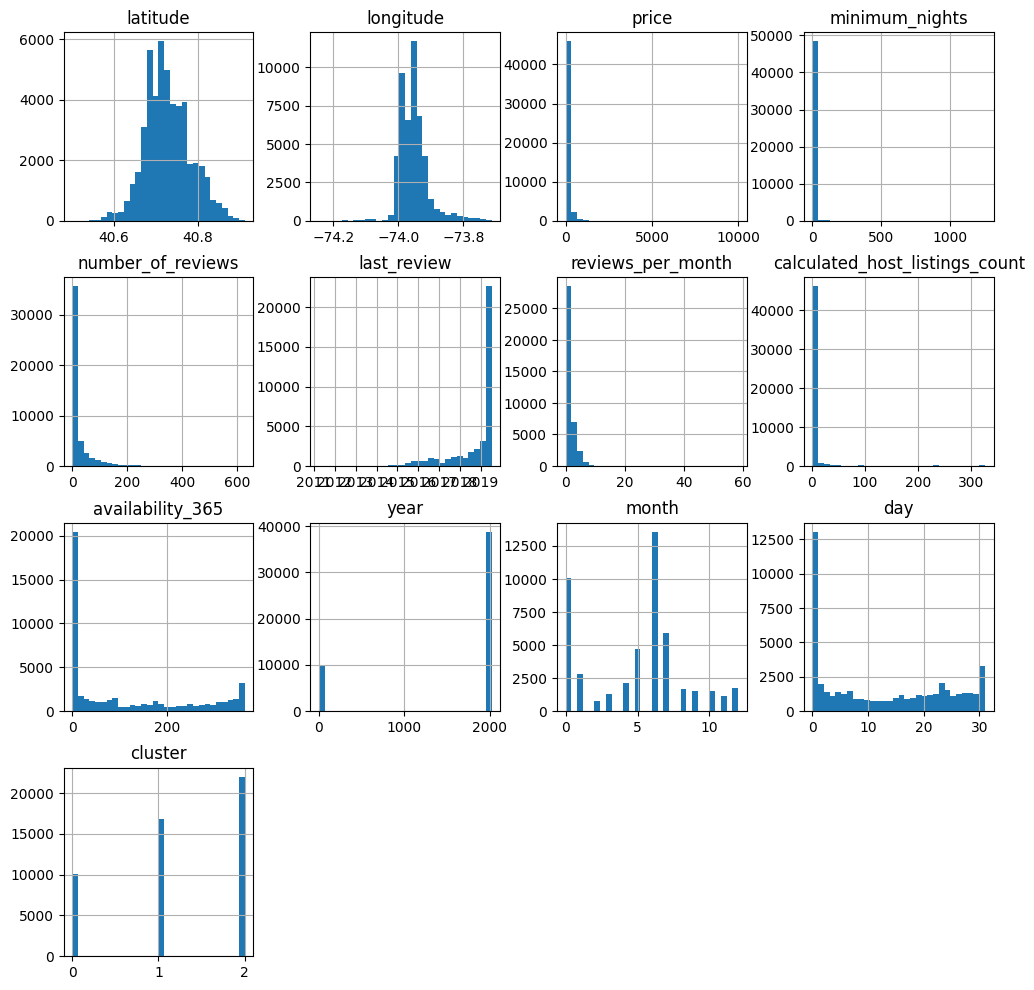

In [39]:
import seaborn as sns  
import matplotlib.pyplot as plt  

df.hist(figsize=(12, 12), bins=30)  
plt.show()

### 2.1.2. Boxplot

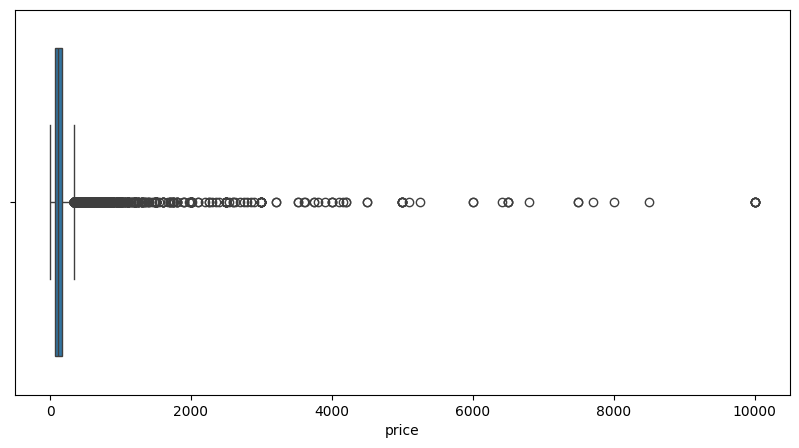

In [7]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["price"])  
plt.show()

### 2.1.3. Countplot

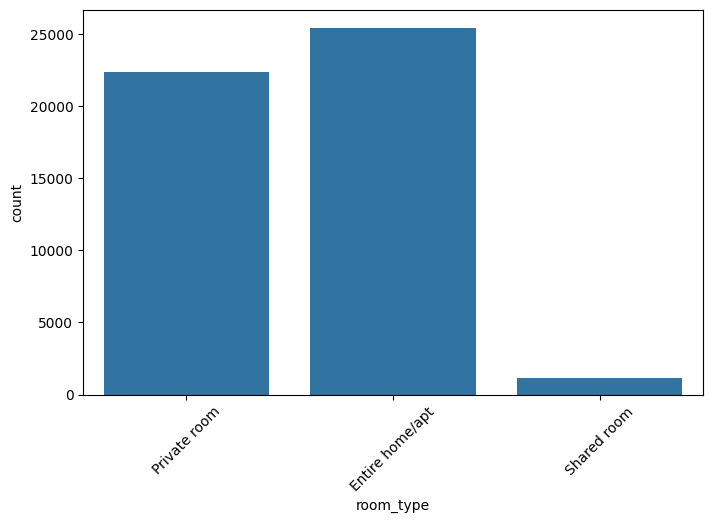

In [8]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df["room_type"])  
plt.xticks(rotation=45)
plt.show()

### 2.2. Análisis Bivariante

### 2.2.1. Scatterplot

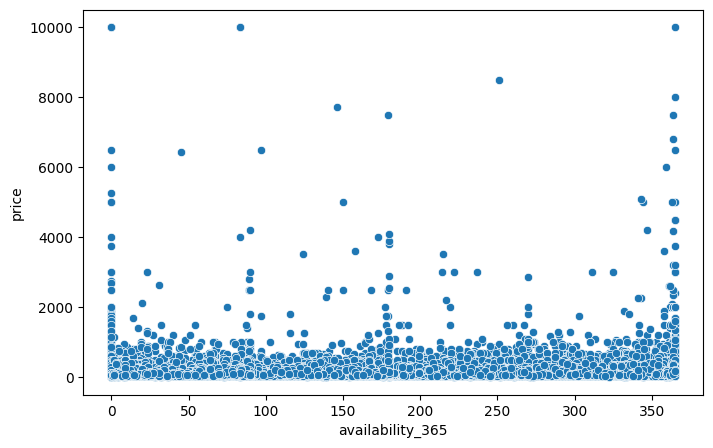

In [9]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["availability_365"], y=df["price"])  
plt.show()

### 2.3. Análisis Multivariante

### 2.3.1 Heatmap

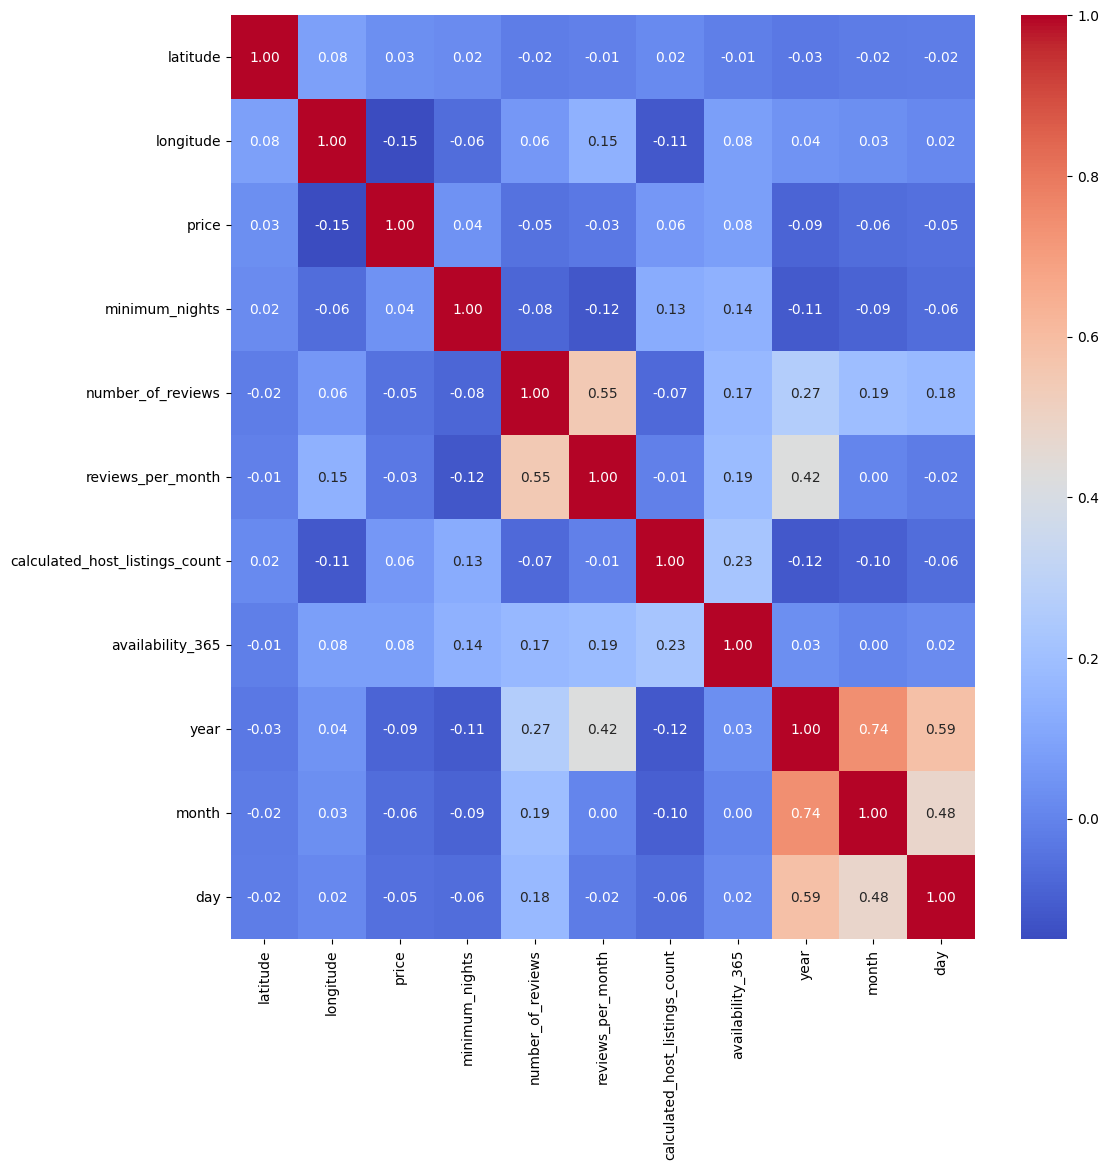

In [10]:
numeric_df = df.select_dtypes(include=["float64", "int64"])

plt.figure(figsize=(12, 12))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")  

plt.show()

### 2.3.2. Pairplot

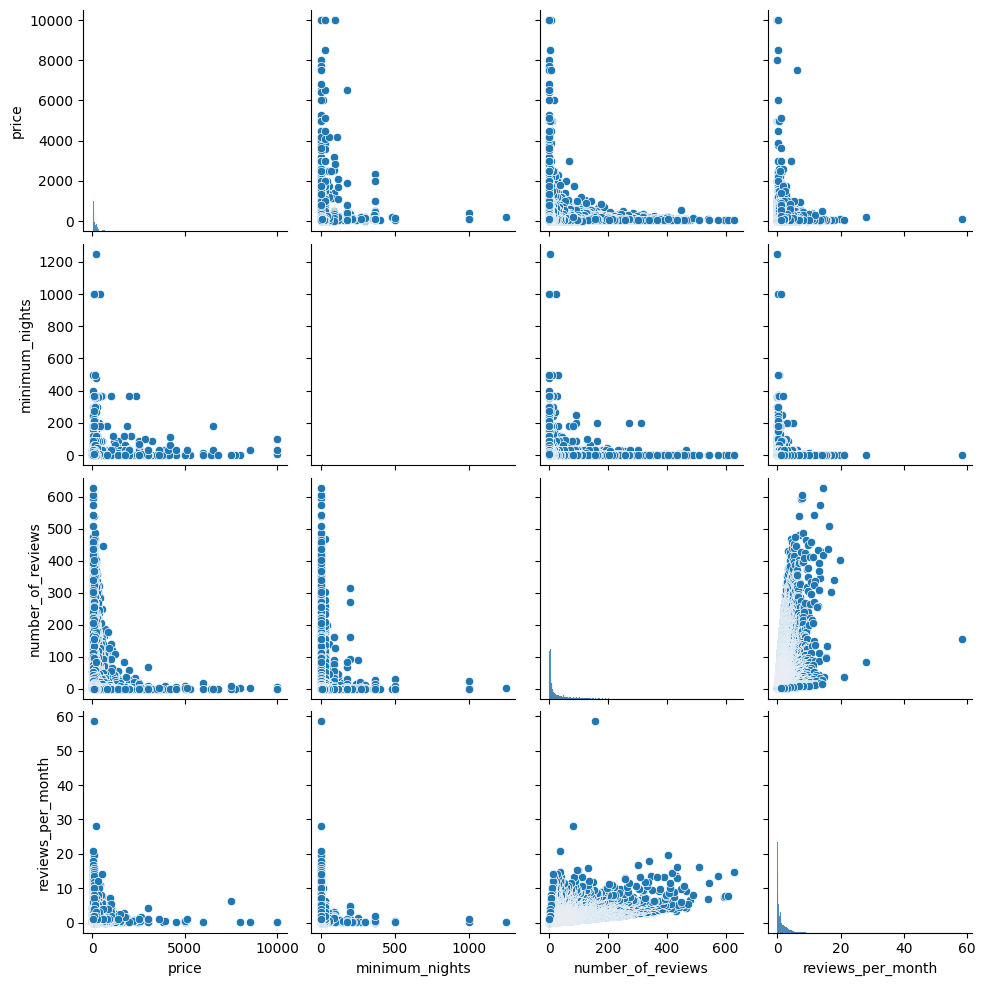

In [11]:
sns.pairplot(df[["price", "minimum_nights", "number_of_reviews", "reviews_per_month"]])  

plt.show()

## 1.3. Preprocesados.

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PowerTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer

num_cols = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 
            'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 
            'year', 'month', 'day']
cat_cols = ['name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review']

### 1.3.1. variables númericas.

In [13]:
numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('transformer', PowerTransformer())
])

### 1.3.2. variables categóricas.

In [14]:
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Rellena NaN con el valor más frecuente
    ('encoder', OneHotEncoder(handle_unknown='ignore'))      # Crea variables dummy, ignorando categorías no vistas en test
])

### 1.3.3. preprocesamiento de los datos 

In [15]:
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_pipeline, num_cols),
    ('cat', categorical_pipeline, cat_cols)
])

X = df  
X_preprocessed = preprocessor.fit_transform(X)
print(X_preprocessed)


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 733425 stored elements and shape (48895, 49908)>
  Coords	Values
  (0, 0)	-1.5706606376589902
  (0, 1)	-0.3779964699801233
  (0, 2)	-1.048861525383959
  (0, 3)	-0.04571874387869959
  (0, 4)	-1.1080814976108073
  (0, 5)	1.851734368722035
  (0, 6)	1.5395606780471822
  (0, 7)	0.5064858461287698
  (0, 8)	1.5582120469555112
  (0, 9)	0.6704649524612168
  (0, 12338)	1.0
  (0, 47916)	1.0
  (0, 48028)	1.0
  (0, 48142)	1.0
  (0, 49645)	1.0
  (1, 0)	0.4929675292195553
  (1, 1)	-0.6852613947674209
  (1, 2)	-1.048861525383959
  (1, 3)	1.4099978848386459
  (1, 4)	-0.825068113315168
  (1, 5)	0.1582926133782017
  (1, 6)	1.512559442017565
  (1, 7)	0.5141158885162843
  (1, 8)	-0.004335254920234978
  (1, 9)	0.8286325324878706
  :	:
  (48893, 5)	1.851734368722035
  (48893, 6)	-0.9539378002015846
  (48893, 7)	-1.9656954073977524
  (48893, 8)	-1.4236140874308283
  (48893, 9)	-1.2178822597066425
  (48893, 2582)	1.0
  (48893, 47917)	1.0
  (48893, 4

### 1.3.4. PCA.

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
X_reduced = pca.fit_transform(X_preprocessed.toarray())  
print(f"Forma de los datos después de PCA: {X_reduced.shape}")

Forma de los datos después de PCA: (48895, 50)


## 1.4. Clustering y siluetas.

In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
X = df.drop('price', axis=1)
y = df['price']

In [ ]:
X = df.drop('price', axis=1)
y = df['price']

X_preprocessed = preprocessor.fit_transform(X)

from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(score_func=f_regression, k=5)
X_selected = selector.fit_transform(X_preprocessed, y)

print("Forma de X_selected (SelectKBest para regresión):", X_selected.shape)


Forma de X_selected (SelectKBest para regresión): (48895, 5)


### 1.4.1. KMeans

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt


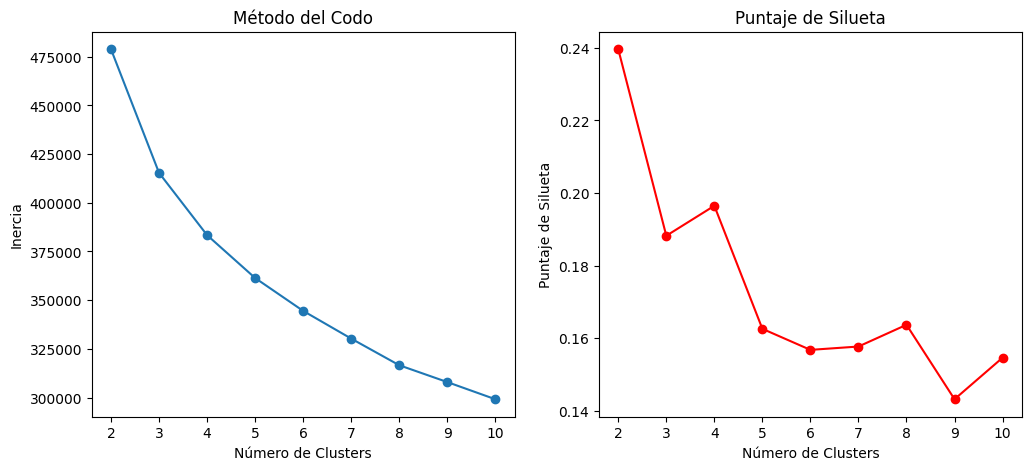

In [ ]:
inertia = []
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_pca)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_pca, labels))

plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', color='red')
plt.xlabel('Número de Clusters')
plt.ylabel('Puntaje de Silueta')
plt.title('Puntaje de Silueta')

plt.show()


### 1.4.2. Gráfico EDA.

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
X["cluster"] = kmeans.fit_predict(X_pca)  

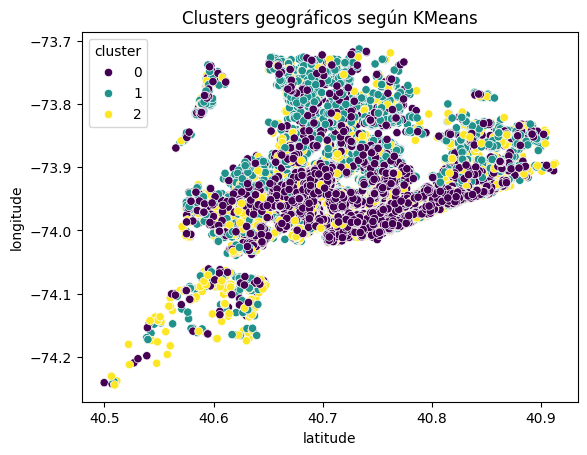

In [ ]:
sns.scatterplot(x=X["latitude"], y=X["longitude"], hue=X["cluster"], palette="viridis")
plt.title("Clusters geográficos según KMeans")
plt.show()

## 1.5. Feature selection.

### 1.5.1. SelectKBest

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k=5)
X_selected = selector.fit_transform(X_preprocessed, y)

print("Forma de X_selected (SelectKBest para regresión):", X_selected.shape)

scores = selector.scores_
print("Scores de cada característica:", scores)

Forma de X_selected (SelectKBest para regresión): (48895, 5)
Scores de cada característica: [8.09630456e+01 1.18431724e+03 7.18416941e+01 ... 1.85430820e+00
 6.64356181e-01 3.53736280e+00]


### 1.5.2. PCA

Forma de X_pca_selected (PCA para clasificación): (48895, 5)


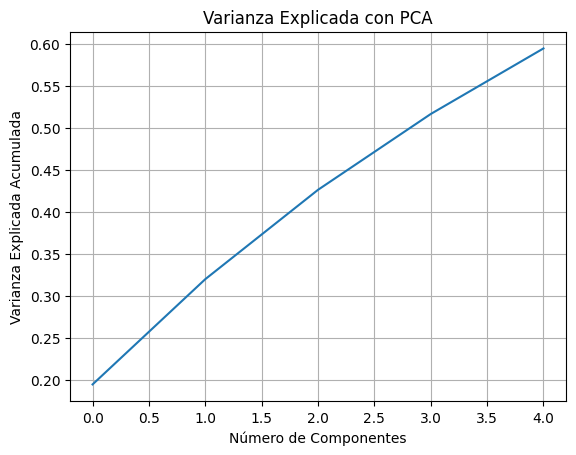

In [41]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
X_pca_selected = pca.fit_transform(X_preprocessed)

print("Forma de X_pca_selected (PCA para clasificación):", X_pca_selected.shape)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada con PCA')
plt.grid()
plt.show()

### 1.5.3. Comparación modelos.

Forma de X_selected (SelectKBest para regresión): (48895, 5)
Scores de las características: [8.09630456e+01 1.18431724e+03 7.18416941e+01 ... 1.85430820e+00
 6.64356181e-01 3.53736280e+00]
Forma de X_pca_selected (PCA para clasificación): (48895, 5)


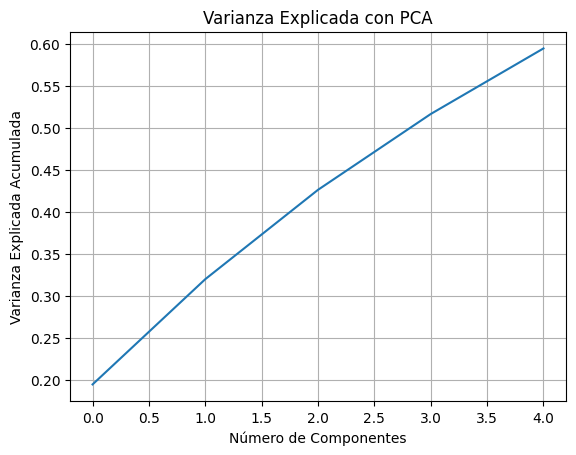

Puntuación promedio (SelectKBest): 0.06315275726778413
Puntuación promedio (PCA): -0.0611325006572546


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

model_sel = RandomForestRegressor(random_state=42)
scores_sel = cross_val_score(model_sel, X_selected, y, cv=5)
print("Puntuación promedio (SelectKBest):", scores_sel.mean())

model_pca = RandomForestRegressor(random_state=42)
scores_pca = cross_val_score(model_pca, X_pca_selected, y, cv=5)
print("Puntuación promedio (PCA):", scores_pca.mean())

## 1.6. Regresión.

In [ ]:
X = df.drop('price', axis=1)
y = df['price']

num_cols = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 
            'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 
            'year', 'month', 'day']
cat_cols = ['name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review']

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PowerTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('transformer', PowerTransformer())
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_pipeline, num_cols),
    ('cat', categorical_pipeline, cat_cols)
])

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)

from sklearn.pipeline import Pipeline

regression_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),      # Preprocesa las características
    ('feature_selection', feature_selector),  # Selección de características (opcional)
    ('regressor', model)                 # Modelo de regresión
])

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regression_pipeline.fit(X_train, y_train)

from sklearn.metrics import r2_score, mean_squared_error

y_pred = regression_pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R²:", r2)
print("MSE:", mse)


R²: 0.1053200173157054
MSE: 39579.0659305624


## 1.7. Clasificación multiclase.

In [ ]:
X = df.drop('room_type', axis=1)
y = df['room_type']

num_cols = ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 
            'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 
            'year', 'month', 'day']
cat_cols = ['name', 'neighbourhood_group', 'neighbourhood', 'last_review']

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PowerTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('transformer', PowerTransformer())
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_pipeline, num_cols),
    ('cat', categorical_pipeline, cat_cols)
])

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=42)

from sklearn.pipeline import Pipeline

classification_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),   # Preprocesa las características
    ('pca', pca),                     # Aplica PCA para reducir la dimensionalidad
    ('classifier', classifier)        # Modelo de clasificación
])

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classification_pipeline.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = classification_pipeline.predict(X_test)

print("Precisión:", accuracy_score(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred))


Precisión: 0.8498824010635034

Reporte de Clasificación:
                  precision    recall  f1-score   support

Entire home/apt       0.87      0.88      0.87      5029
   Private room       0.83      0.85      0.84      4509
    Shared room       0.89      0.17      0.28       241

       accuracy                           0.85      9779
      macro avg       0.86      0.63      0.66      9779
   weighted avg       0.85      0.85      0.84      9779


Matriz de Confusión:
 [[4428  600    1]
 [ 662 3843    4]
 [  18  183   40]]


## 1.8. Comparar resultados de modelos con validación cruzada.

In [ ]:
X_reg = df.drop('price', axis=1)
y_reg = df['price']

num_cols = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 
            'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 
            'year', 'month', 'day']
cat_cols = ['name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review']

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PowerTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('transformer', PowerTransformer())
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_pipeline, num_cols),
    ('cat', categorical_pipeline, cat_cols)
])

from sklearn.feature_selection import SelectKBest, f_regression
feature_selector = SelectKBest(score_func=f_regression, k=10)

from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()

regression_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', feature_selector),
    ('regressor', regression_model)
])


In [ ]:
X_clf = df.drop('room_type', axis=1)
y_clf = df['room_type']

num_cols_clf = ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 
                  'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 
                  'year', 'month', 'day']
cat_cols_clf = ['name', 'neighbourhood_group', 'neighbourhood', 'last_review']

preprocessor_clf = ColumnTransformer(transformers=[
    ('num', numeric_pipeline, num_cols_clf),
    ('cat', categorical_pipeline, cat_cols_clf)
])

from sklearn.decomposition import PCA
pca = PCA(n_components=10)

from sklearn.ensemble import RandomForestClassifier
classification_model = RandomForestClassifier(random_state=42)

classification_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_clf),
    ('pca', pca),
    ('classifier', classification_model)
])

In [ ]:
from sklearn.model_selection import cross_validate
import pandas as pd
import time

scoring_regression = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2']
scoring_classification = ['accuracy', 'f1_weighted']

results = []

start_time = time.time()
cv_results_reg = cross_validate(regression_pipeline, X_reg, y_reg, scoring=scoring_regression, cv=5, return_train_score=True)
end_time = time.time()
results.append({
    'Modelo': 'Regresión (LinearRegression)',
    'MAE': -cv_results_reg['test_neg_mean_absolute_error'].mean(),
    'MSE': -cv_results_reg['test_neg_mean_squared_error'].mean(),
    'R2': cv_results_reg['test_r2'].mean(),
    'Tiempo (s)': end_time - start_time
})

start_time = time.time()
cv_results_clf = cross_validate(classification_pipeline, X_clf, y_clf, scoring=scoring_classification, cv=5, return_train_score=True)
end_time = time.time()
results.append({
    'Modelo': 'Clasificación (RandomForestClassifier)',
    'Accuracy': cv_results_clf['test_accuracy'].mean(),
    'F1 Score': cv_results_clf['test_f1_weighted'].mean(),
    'Tiempo (s)': end_time - start_time
})

df_results = pd.DataFrame(results)
print(df_results)

                                   Modelo        MAE           MSE        R2  \
0            Regresión (LinearRegression)  74.648164  55073.411019  0.037364   
1  Clasificación (RandomForestClassifier)        NaN           NaN       NaN   

   Tiempo (s)  Accuracy  F1 Score  
0    2.452527       NaN       NaN  
1   48.922522  0.835914  0.829221  


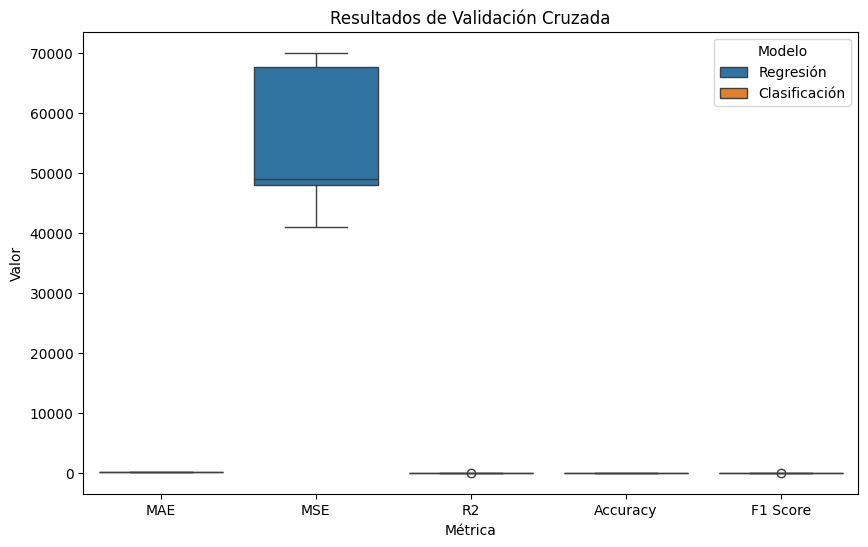

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_reg = pd.DataFrame({
    'MAE': -cv_results_reg['test_neg_mean_absolute_error'],
    'MSE': -cv_results_reg['test_neg_mean_squared_error'],
    'R2': cv_results_reg['test_r2']
})
df_reg = df_reg.melt(var_name='Métrica', value_name='Valor')
df_reg['Modelo'] = 'Regresión'

df_clf = pd.DataFrame({
    'Accuracy': cv_results_clf['test_accuracy'],
    'F1 Score': cv_results_clf['test_f1_weighted']
})
df_clf = df_clf.melt(var_name='Métrica', value_name='Valor')
df_clf['Modelo'] = 'Clasificación'

df_box = pd.concat([df_reg, df_clf], axis=0)

plt.figure(figsize=(10,6))
sns.boxplot(x='Métrica', y='Valor', hue='Modelo', data=df_box)
plt.title("Resultados de Validación Cruzada")
plt.show()